In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [2]:
def PolynomialRegression(degree = 2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

Creating some data

In [95]:
import numpy as np

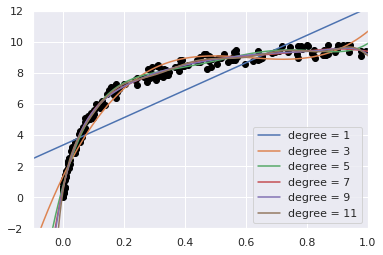

In [99]:
def make_data(N, err = 1.0, rseed = 1):
  rng = np.random.RandomState(rseed)
  X = rng.rand(N, 1) ** 2
  Y = 10 - 1./(X.ravel() + 0.1)
  if err > 0:
    Y += err*rng.rand(N)
  return X, Y

X, Y = make_data(200)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

Xtest = np.linspace(-0.1, 1.1, 500)
X_test = Xtest[:, np.newaxis]

plt.scatter(X.ravel(), Y, color = 'black')
axis = plt.axis()
for degree in [1, 3, 5, 7, 9, 11]:
  Ytest = PolynomialRegression(degree).fit(X, Y).predict(X_test)
  plt.plot(Xtest.ravel(), Ytest, label = 'degree = {0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc = 'best');

FINDING THE RIGHT BALANCE B/W BIAS AND VARIANCE

In [100]:
from sklearn.model_selection import validation_curve

In [101]:
train_score, val_score = validation_curve(PolynomialRegression(), X, Y, param_name = 'polynomialfeatures__degree', param_range = np.arange(0, 20), cv = 7)

In [102]:
print(train_score)

[[0.         0.         0.         0.         0.         0.
  0.        ]
 [0.72563772 0.72552063 0.7311126  0.73297283 0.71488799 0.7260305
  0.72040716]
 [0.92471097 0.92657716 0.92417188 0.92365672 0.92069382 0.92214074
  0.92412696]
 [0.96863004 0.97106135 0.96899339 0.97007623 0.96869388 0.97073374
  0.97076769]
 [0.98514915 0.98619543 0.98522955 0.98579814 0.98512017 0.98598059
  0.98612769]
 [0.99064959 0.9904576  0.98996672 0.99027408 0.9896363  0.99059135
  0.99065869]
 [0.99229708 0.99192424 0.99177616 0.9919871  0.99158556 0.9919808
  0.99198825]
 [0.99246095 0.99210273 0.99194855 0.99217215 0.99182377 0.99211852
  0.99211655]
 [0.99268417 0.99218507 0.99217011 0.99223011 0.99190456 0.99217123
  0.99235107]
 [0.99268678 0.99218509 0.99217744 0.99223023 0.99190809 0.99217634
  0.99235136]
 [0.99342124 0.99287621 0.99256438 0.9931871  0.99242569 0.99283329
  0.99290575]
 [0.99392239 0.99325936 0.99292315 0.99329507 0.9926897  0.99297107
  0.99319473]
 [0.99393658 0.99326775 0.

In [103]:
print(val_score)

[[-0.04768847 -0.00263961 -0.12647298 -0.05115513 -0.02002317 -0.0253333
  -0.00568569]
 [ 0.71061262  0.72236264  0.6358472   0.65670701  0.76594317  0.71374542
   0.7564713 ]
 [ 0.91355944  0.90624773  0.90898459  0.91936441  0.9354235   0.92926907
   0.91940615]
 [ 0.97457944  0.96200599  0.97305508  0.9661261   0.9741692   0.96310073
   0.96216421]
 [ 0.98757064  0.98211848  0.98696268  0.9831135   0.98767837  0.98303437
   0.98193347]
 [ 0.98758558  0.98927305  0.99191637  0.98995474  0.99327758  0.98841766
   0.98759367]
 [ 0.98908493  0.99172486  0.99204044  0.99039493  0.99324801  0.99121234
   0.99101383]
 [ 0.9892986   0.99188271  0.99223538  0.99089533  0.99309096  0.9915831
   0.99149993]
 [ 0.98870815  0.9922073   0.99134613  0.99120142  0.99341395  0.9919999
   0.99066644]
 [ 0.98865783  0.99220882  0.99125582  0.9912173   0.99338754  0.99196543
   0.99067121]
 [ 0.98844029  0.99210042  0.9937226   0.98310621  0.99434886  0.99210781
   0.99154378]
 [ 0.98750766  0.9919440

Text(0, 0.5, 'score')

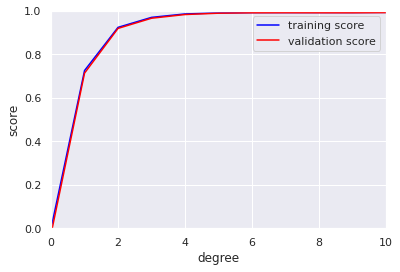

In [104]:
deg = np.arange(0, 20)
plt.plot(deg, np.median(train_score, 1), color = 'blue', label = 'training score')
plt.plot(deg, np.median(val_score, 1), color = 'red', label = 'validation score')
plt.legend(loc = 'best')
plt.ylim(0, 1)
plt.xlim(0, 10)
plt.xlabel('degree')
plt.ylabel('score')

LEARNING CURVES